In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
def truncfunc(finepoints, trunc,chord):
    lim = (1-trunc)*chord
    finepointstruncpos = finepoints[(finepoints[:,0]<=lim),0:2]
    finepointstruncneg = finepoints[(finepoints[:,2]<=lim),2:4] 
    finepointstrunc = np.concatenate((finepointstruncpos,finepointstruncneg),axis=1)   
    return(finepointstrunc)

def rotate(finepoints, deg):
    rad = deg*np.pi/180
    xposrot = finepoints[:,0]*math.cos(rad) + finepoints[:,1]*math.sin(rad)
    yposrot = -finepoints[:,0]*math.sin(rad) + finepoints[:,1]*math.cos(rad)
    xnegrot = finepoints[:,2]*math.cos(rad) + finepoints[:,3]*math.sin(rad)
    ynegrot = -finepoints[:,2]*math.sin(rad) + finepoints[:,3]*math.cos(rad)
    finepointsangled = np.concatenate((xposrot[:,np.newaxis],yposrot[:,np.newaxis],xnegrot[:,np.newaxis],ynegrot[:,np.newaxis]),axis=1)
    return(finepointsangled)

(0.0, 8.0)

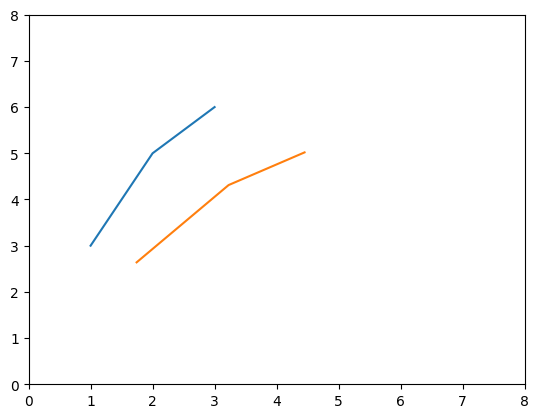

In [69]:
x = [1, 2, 3]
y = [3, 5, 6]
x = np.array(x)
y = np.array(y)
plt.plot(x,y)

radians = 15*np.pi/180
xx = x * math.cos(radians) + y * math.sin(radians)
yy = -x * math.sin(radians) + y * math.cos(radians)

plt.plot(xx,yy)
plt.xlim(0,8)
plt.ylim(0,8)

In [8]:
Chord = 22.86
xpos = [1*Chord,.95036*Chord,.90064*Chord,.80116*Chord,.70162*Chord,.60202*Chord,.50235*Chord,.40256*Chord,.30265*Chord,.25262*Chord,.20253*Chord,.15001*Chord,.09423*Chord,.06601*Chord,.03853*Chord,.01331*Chord,.00277*Chord,0]
ypos = [0*Chord,.01724*Chord,.03115*Chord,.05687*Chord,.07988*Chord,.10008*Chord,.1169*Chord,.12928*Chord,.13546*Chord,.13535*Chord,.13237*Chord,.12528*Chord,.11049*Chord,.09844*Chord,.08172*Chord,.05764*Chord,.04017*Chord,0]
xneg = [0,.02223*Chord,.03669*Chord,.06147*Chord,.08399*Chord,.10577*Chord,.14999*Chord,.19747*Chord,.24738*Chord,.29735*Chord,.39744*Chord,.49766*Chord,.59798*Chord,.69838*Chord,.79884*Chord,.89936*Chord,.94964*Chord,1*Chord]
yneg = [0,-.03303*Chord,-.04432*Chord,-.05862*Chord,-.0686*Chord,-.07647*Chord,-.08852*Chord,-.09703*Chord,-.10223*Chord,-.10454*Chord,-.10278*Chord,-.09482*Chord,-.08242*Chord,-.06664*Chord,-.04803*Chord,-.02673*Chord,-.01504*Chord,0]
xpos = np.flip(xpos)
ypos = np.flip(ypos)

xstep = .001
xfineneg = np.arange(0,Chord+xstep,xstep)
xfinepos = np.flip(xfineneg)
yfinepos = np.flip(np.interp(xfineneg,xpos,ypos))
yfineneg = np.interp(xfineneg,xneg,yneg)

finepoints = np.concatenate((xfinepos[:,np.newaxis],yfinepos[:,np.newaxis],xfineneg[:,np.newaxis],yfineneg[:,np.newaxis]),axis =1)

trunc = [0,.05,.2,.5]
angle = [0,5,10,20]
mainarr = np.zeros((np.size(trunc)*np.size(angle),4))
for t in range(np.size(trunc)):
    for a in range(np.size(angle)):
        trunced= truncfunc(finepoints,trunc[t],Chord)
        rot = rotate(trunced, angle[a])
        maxxpos = max(rot[:,0])
        maxxneg = max(rot[:,2])
        maxx = max([maxxpos,maxxneg])
        minxpos = min(rot[:,0])
        minxneg = min(rot[:,2])
        minx = min([minxpos,minxneg])        
        tarea = maxx-minx
        maxy = max(rot[:,1])
        miny = min(rot[:,3])
        farea = maxy-miny
        mainarr[t*4+a,0]=trunc[t]
        mainarr[t*4+a,1]=angle[a]
        mainarr[t*4+a,2]=farea
        mainarr[t*4+a,3]=tarea



In [9]:
print(mainarr)

[[ 0.          0.          5.48638855 22.86      ]
 [ 0.          5.          5.76180286 22.7730108 ]
 [ 0.         10.          6.49742619 22.51270523]
 [ 0.         20.          9.45530678 21.48137331]
 [ 0.05        0.          5.48638855 21.717     ]
 [ 0.05        5.          5.76180286 21.66890956]
 [ 0.05       10.          6.49742619 21.45590563]
 [ 0.05       20.          9.38514807 20.54288443]
 [ 0.2         0.          5.48638855 18.288     ]
 [ 0.2         5.          5.76180286 18.33224956]
 [ 0.2        10.          6.49742619 18.23697963]
 [ 0.2        20.          8.91806089 17.63183787]
 [ 0.5         0.          5.48638855 11.43      ]
 [ 0.5         5.          5.76180286 11.61999552]
 [ 0.5        10.          6.33783435 11.72155585]
 [ 0.5        20.          7.57666721 11.65695816]]


In [11]:
import pandas as pd
df = pd.DataFrame(mainarr)
df.to_csv('areas.csv')